# <center> **Car Price Analysis - Marketing**

## Objectives

In this Notebook Explanotory Data Analysis (EDA) and Vizualisation Analysis are performed on the "Car Price Prediction" data set [Kaggle](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction). 



---

For this project different Python librarires are used for analysis and vizualisation. Libraries are imported prior furtherwork on the project.

In [29]:
import pandas as pd                 #import Pandas for data manipulation
import numpy as np                  #import Numpy for numerical operations
import matplotlib.pyplot as plt     #import Matplotlib for data visualization
import seaborn as sns               #import Seaborn for statistical data visualization
from plotly.subplots import make_subplots  #import Plotly subplots for creating complex figures
import plotly.express as px         #import Plotly Express for interactive visualizations

Style and plot size are set

In [30]:
sns.set(style="whitegrid")                  # Set Seaborn style for plots
plt.rcParams["figure.figsize"] = (10,6)     # Set default figure size for Matplotlib plots

### ***1. Explanatory Data Analysis***

##### In this section EDA, including data load and cleaning, is performed.

As a first step, "CarPrice_Assignment.csv" data set is loaded into DataFrame

In [31]:
df = pd.read_csv('../Data/CarPrice_Assignment.csv')  # Load the car price dataset
df.head()                                            # Display the first few rows of the dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### ***1.1 Initial data exploration***

*In the following subsection initial data set inspection is performed*

Here the shape and Info of DataFrame are shown

In [32]:
print(df.shape)                     # Print the shape of the DataFrame           
print(df.info())                    # Print concise summary of the DataFrame            
print(df.dtypes)                    # Print data types of each column

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

As it can been, DataFrame consists of 205 etries and 26 columns with following types:
* float64(8)
* int64(8)
* object(10)

In the next steps DataFrame is checked for any incosistencies(dublicates, missing value and etc.)

In [33]:
df.isnull().sum()                 # Check for missing values in each column


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

as we can see above the DataFrame has no missing values. Let's check for duplicates:

In [34]:
df.duplicated() # Check for duplicate rows in the DataFrame


0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

And there are no duplicates. Initial data inspection shows that DataFrame has no missing values and duplicates, which simplifies further work with Data.

In following cell a descriptive statistics of numeric columns is shown

In [35]:
df.describe() # Generate descriptive statistics of numerical columns

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Summary od descriptive statistics:
* The dataset spans a wide spectrum of cars, not just one segment.
* Horsepower, engine size, and curb weight strongly influence price.
* Data is clean, numeric-heavy, and ready for transformation.

---

##### ***1.2 Data cleaning and preparation***

##### *In this subsection basic data cleaning and preparation for visualizations are performed*

Copy original DataFrame

In [36]:
df_cleaned = df.copy()          # Create a copy of the original DataFrame for cleaning

Fetching all columns names

In [37]:
df_cleaned.columns          # Display the column names of the DataFrame

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

For further analysis "car_ID" column can be dropped

In [38]:
df_cleaned.drop("car_ID",axis=1,inplace=True)
df_cleaned.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's take a close look on "CarName" column.The column "brand" is extracted, car brands are uniformly renamed and old "CarName" column is dropped.

In [39]:
        
df_cleaned['brand'] = df_cleaned['CarName'].apply(lambda x: str(x).split(' ')[0].lower())   # Extract car brand from "CarName" column                                        
df_cleaned = df_cleaned.drop(['CarName'], axis=1)                                           # Drop the original "CarName" column
df_cleaned.head()                                                                                   

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Earlier, "brand" column have been checked for duplicates, but let's take a closer look on unique brand names.

In [40]:
df_cleaned ['brand'].unique()  # Check unique values in the 'brand' column

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

"Brand" column contains the same names, but with typos or different way of spelling, e.g. 'maxda'and 'mazda', 'toyota' and 'toyouta' and etc. It is necessary to replace duplicates.

In [41]:
doubles = {'maxda':'mazda','porcshce':'porsche','toyouta':'toyota',
         'vokswagen':'volkswagen','vw':'volkswagen'}    # Dictionary to map duplicate brand names to correct ones                                                                    
df_cleaned['brand'] = df_cleaned['brand'].replace(doubles)              # Replace duplicate brand names with correct ones   

Changes verification

In [42]:
df_cleaned['brand'].unique()  # Check unique values in the 'brand' column again to confirm changes

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Now we check "doornumber" column for unique names.

In [43]:
df_cleaned ['doornumber'].unique()      # Check unique values in the 'doornumber' column    

array(['two', 'four'], dtype=object)

Replace text features with numbers and set column type as integer

In [44]:
df_cleaned['doornumber'] = df_cleaned['doornumber'].str.strip().str.lower()  # Clean up whitespace and convert to lowercase

door_map = {
    'two': 2,
    'four': 4 
    }         # Create a mapping dictionary


df_cleaned['doornumber'] = df_cleaned['doornumber'].replace(door_map).astype(int)# Replace and cast to int


C:\Users\julia\AppData\Local\Temp\ipykernel_38440\42335584.py:9: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



And check for resultes

In [45]:
print(df_cleaned['doornumber'].unique())
print(df_cleaned['doornumber'].dtype)

[2 4]
int64


Also number of cylinders were chaged to numbers, and dtype to integer

In [46]:
print(df_cleaned['cylindernumber'].unique()) # Check unique values in the 'cylindernumber' column                                        

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [47]:
# Clean up whitespace and convert to lowercase
df_cleaned['cylindernumber'] = (
    df_cleaned['cylindernumber']
      .astype(str)
      .str.strip()
      .str.lower()
)
# Create a mapping dictionary
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
# Replace and cast to int
df_cleaned['cylindernumber'] = df_cleaned['cylindernumber'].replace(cylinder_map).astype(int)

C:\Users\julia\AppData\Local\Temp\ipykernel_38440\3464359280.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Verify changes

In [48]:
print(df_cleaned['cylindernumber'].unique())
print(df_cleaned['cylindernumber'].dtype)

[ 4  6  5  3 12  2  8]
int64


The cleaning and data preparation phase is finished. Data set is ready for further visualisation in Python and Tableau.

---

#### Push .csv file to Repo

Save cleaned data into dedicated reporsitory on GitHub

In [49]:
df_cleaned.to_csv('../Data/car_price_cleaned_data.csv', index=False)


---

### ***2. Visualization Analysis***

In this subsection visualisations and brief analysis are represented for the Car Price data set data set. 

##### 2.1 Pairplot of key features vs price (Seaborn) 

We start visualization analysis with the Pairplot

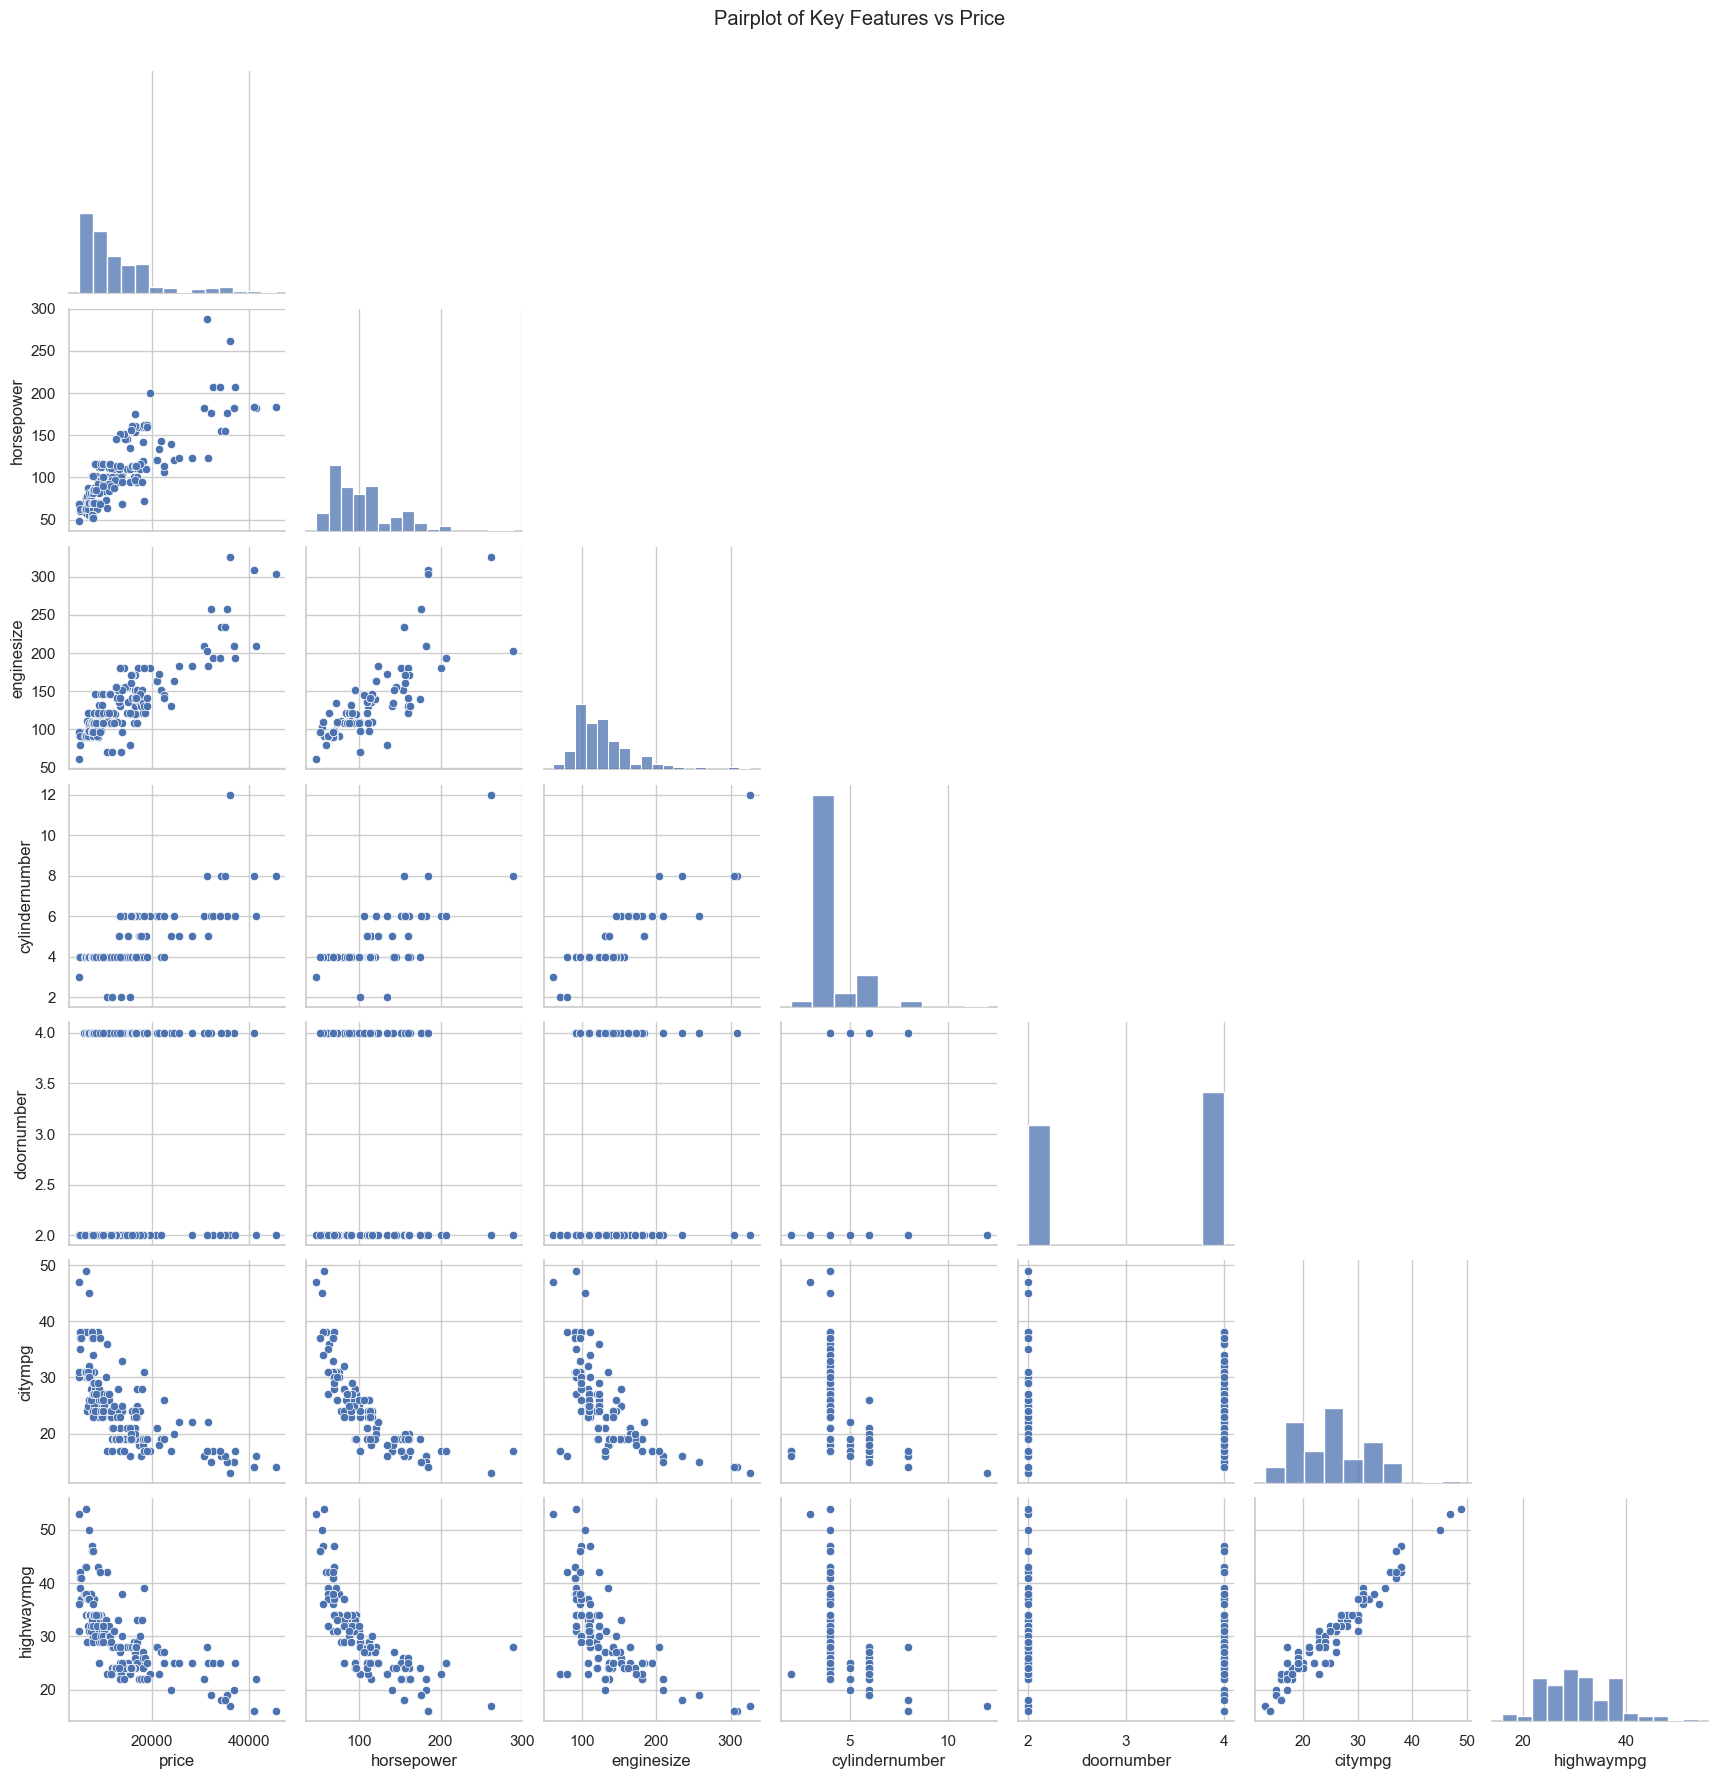

In [50]:
# Pairplot of Key Features vs Price
cols = ['price', 'horsepower', 'enginesize', 'cylindernumber', 'doornumber', 'citympg', 'highwaympg']  # Define columns for pairplot    

# Subset and plot
sns.pairplot(df_cleaned[cols], diag_kind='hist', corner=True) # Create pairplot using cleaned DataFrame
plt.suptitle("Pairplot of Key Features vs Price", y=1.02)     # Set title for the plot
plt.show()                                                    # Display the plot

Key findings:
* The price–horsepower and price–enginesize plots show strong upward trends.
* Price–cylindernumber also increases stepwise → more cylinders → higher prices.
* Price–mpg trend is negative → higher fuel efficiency corresponds to cheaper cars.
* Door number shows minimal variation, confirming it’s not a major price driver.

##### 2.2 Correlation heatmap (Seaborn) 

Let’s visualize the numeric relationships with the help of correlation heatmap

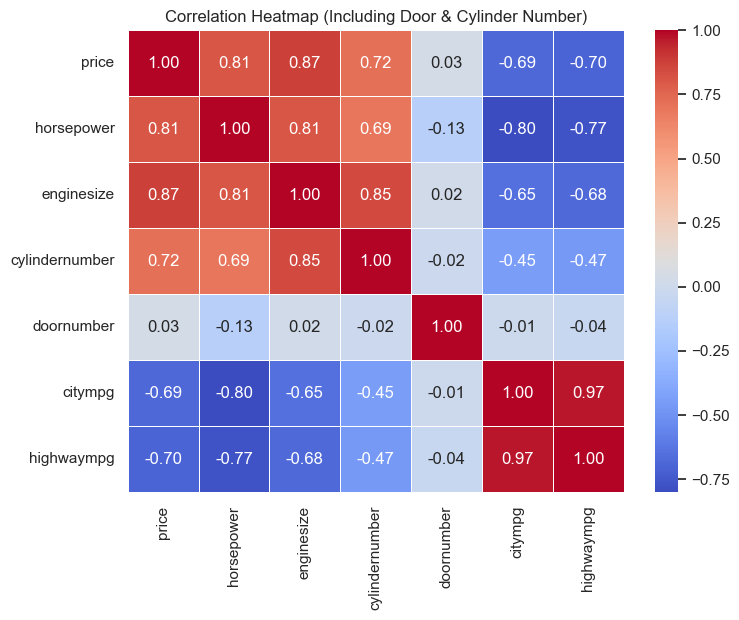

In [51]:
plt.figure(figsize=(8,6))    # Set figure size for heatmap
corr = df_cleaned[cols].corr() # Compute correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) # Create heatmap with annotations
plt.title("Correlation Heatmap (Including Door & Cylinder Number)") # Set title for the heatmap
plt.show()  # Display the heatmap

Key findings: 
* Correlation price vs horsepower is 0.81, meaning strong positive — key driver.
* Correlation price vs enginesize is 0.87, meaning even stronger — key driver.
* Correlation price vs cylindernumber is 0.68, means stepwise influence — more cylinders → higher price.
* Correlation price vs doornumber is about ~0.1, very weak — doesn’t affect price much.
* Correlation price vs mpg is −0.70, Higher mpg → lower price (inverse).

##### 2.3 Regression plots (Plotly) 

Regression plots "Horsepower vs price" and "Cylinder Number vs Price"

In [57]:
# Prepare data for Horsepower
fig_hp = px.scatter(df_cleaned, x='horsepower', y='price', trendline='ols')             # Scatter plot with OLS trendline for Horsepower vs Price
hp_scatter = fig_hp.data[0]                                                             # Extract scatter plot data
hp_trendline = fig_hp.data[1]                                                           # Extract trendline data

# Prepare data for Cylindernumber
fig_cyl = px.scatter(df_cleaned, x='cylindernumber', y='price', trendline='ols')        # Scatter plot with OLS trendline for Cylindernumber vs Price
cyl_scatter = fig_cyl.data[0]                                                           # Extract scatter plot data
cyl_trendline = fig_cyl.data[1]                                                         # Extract trendline data

# Create subplot layout
fig = make_subplots(rows=1, cols=2, subplot_titles=("Price vs Horsepower", "Price vs Cylinder Number"))      #  Create a 1x2 subplot layout

# Add both scatter plots and trendlines
fig.add_trace(hp_scatter, row=1, col=1)                                                                      # Add Horsepower scatter plot to first subplot
fig.add_trace(hp_trendline, row=1, col=1)                                                                    # Add Horsepower trendline to first subplot

fig.add_trace(cyl_scatter, row=1, col=2)                                                                     # Add Cylindernumber scatter plot to second subplot
fig.add_trace(cyl_trendline, row=1, col=2)                                                                   # Add Cylindernumber trendline to second subplot

# Update layout
fig.update_layout(
    title_text="Price vs Horsepower & Cylindernumber (with OLS Trendlines)",
    height=500,
    width=1000,
    showlegend=True
)
# Set axis titles for each subplot
fig.update_xaxes(title_text="Horsepower", row=1, col=1)
fig.update_yaxes(title_text="Price", row=1, col=1)

fig.update_xaxes(title_text="Number of Cylinders", row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)
fig.show()

Key finfings:
* Correlation Price vs Horsepower: Strong, nearly linear — horsepower is a main pricing factor.
* Correlation Price ~ Cylindernumber: More cylinders → more powerful → higher price (stepwise pattern).

##### 2.4 Price distribution vs segments (Matplotlib)

It is also important to know price distribution over segments. For this purpose histogram plot was created with the use of Matplotlib.

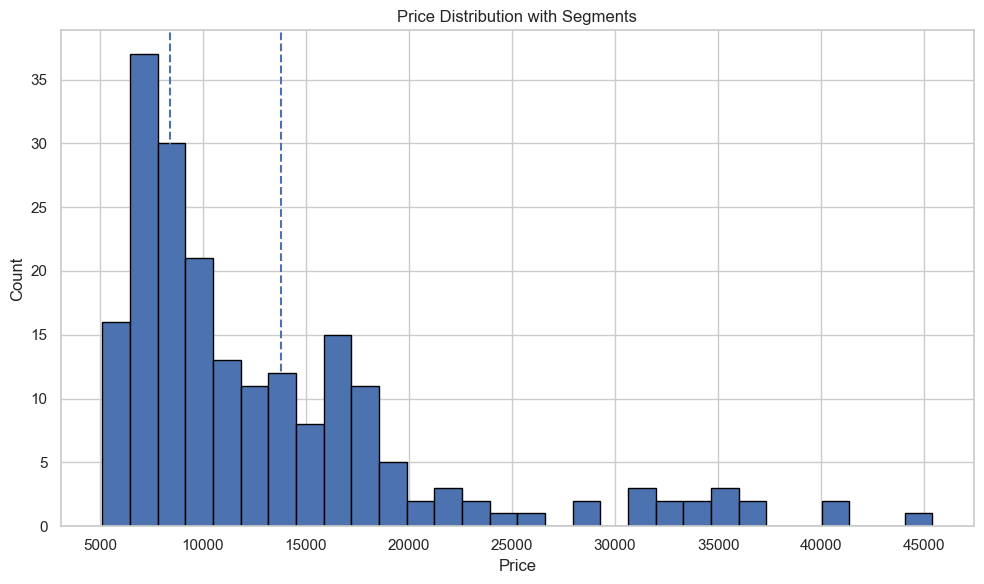

In [53]:
prices = df_cleaned['price'].dropna()    # Extract price data and drop NaNs
q33, q66 = prices.quantile([0.33, 0.66]) # Calculate 33rd and 66th percentiles
plt.figure()                             # Set up the figure
prices.plot(kind='hist', bins=30, edgecolor='black')                    # Plot histogram of prices
plt.axvline(q33, linestyle='--'); plt.axvline(q66, linestyle='--')   # Add vertical lines for percentiles
plt.title('Price Distribution with Segments'); plt.xlabel('Price'); plt.ylabel('Count') # Set titles and labels
plt.tight_layout(); # Adjust layout
plt.show()          # Display the plot

Key findings:
* Most cars are low- to mid-priced; few luxury models raise the tail on the right.
* Tall left bar cluster	indicates the dataset has a majority of affordable compact and sedan models.
* Gradual taper toward high prices indicates that only a few premium and luxury vehicles (BMW, Porsche, Jaguar) occupy the high end.
* Wide spread range (~$5K to $45K) shows this dataset spans multiple market tiers.

##### 2.5 Brand by average price (Plotly)

Below Histogram plot of top 15 brands is presented.

In [54]:
# Average Price by Brand
if 'brand' in df_cleaned.columns:
    brand_avg = df_cleaned.groupby('brand', as_index=False)['price'].mean().sort_values('price', ascending=False)  # Group by brand and calculate average price
    fig = px.bar(brand_avg, x='brand', y='price', title='All Brands by Average Price') # Create bar plot
    fig.show() # Display the plot
else:
    print('car_company not available')  # Print message if 'brand' column is missing

Key findings:
* Clear Brand Hierarchy / Market Segmentation: The highest bars (BMW, Jaguar, Buick) show these brands command premium pricing. Lower bars belong to more affordable brands (Mazda, Nissan etc.). This aligns well with real brand value and prestige.

* Price Gaps Are Large: There’s a steep drop from premium brands to mid-tier ones . This suggests a nonlinear difference in pricing, not just small increments — brand “premiumness” has multiplier effects.

* Mid-Tier Cluster: A cluster of brands in the middle have somewhat similar average prices. These probably represent mainstream manufacturers (Volvo, Audi and etc.). This suggests the mid-market is competitive and somewhat saturated.

* Low-End Brands / Outliers:On the far right, brands with the lowest average prices likely represent economy / budget makers. Their bar length is significantly less, indicating lower performance, fewer premium features, or smaller vehicles.

### ***3. Data visualization analysis summary***

Car pricing in the U.S. market is largely driven by engine performance and brand reputation. Features such as horsepower, engine size, and cylinder number show the strongest positive correlations with price, confirming that performance-oriented attributes define vehicle value. In contrast, fuel efficiency (mpg) correlates negatively with price, indicating that economy-focused models occupy lower price tiers, while design factors like door number have little impact.

The regression results reinforce this:

Price vs Horsepower follows a strong linear trend — more power means higher price.

Price vs Cylinder Number rises in clear steps — each additional cylinder class moves a car into a higher price band.

Overall, the data reveal a three-tier market — Economy, Mid-range, and Premium — where performance, engineering quality, and brand perception collectively determine car prices. 

---

### ***Conclusion***

In this project, we conducted an Exploratory Data Analysis (EDA) on Car Prices dataset.

The analysis included:
* Data inspection & cleaning.
* Price Distribution & Market Segments.
* Pairplot of Key Features.
* Correlation heatmap.
* Regression Plots.
* All brands by average price.
* Overall key finding summary.